<a href="https://colab.research.google.com/github/ValentineAlibert/Data-physics/blob/master/Week4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 4 new version**

In [9]:
#direcotry and download the root form cern
!mkdir -p APPS
!cd APPS && wget https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
!cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz

--2020-03-03 13:44:25--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.13.143, 2001:1458:201:45::100:b
Connecting to root.cern.ch (root.cern.ch)|137.138.13.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.3’

root_v6.13.08.Linux 100%[===================>] 131.05M  24.6MB/s    in 6.1s    

2020-03-03 13:44:32 (21.6 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.3’ saved [137415272/137415272]



In [10]:
#now we can extract some files from ROOT and ensure that we can access the libraries. We use some python key words to get access to the right files:

import sys

sys.path.append("/content/APPS/root/lib")

import ctypes

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')

#ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMinuit.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libFoam.so')

<CDLL '/content/APPS/root/lib/libFoam.so', handle 55a623abc000 at 7f6da2b86490>

Welcome to JupyROOT 6.13/08


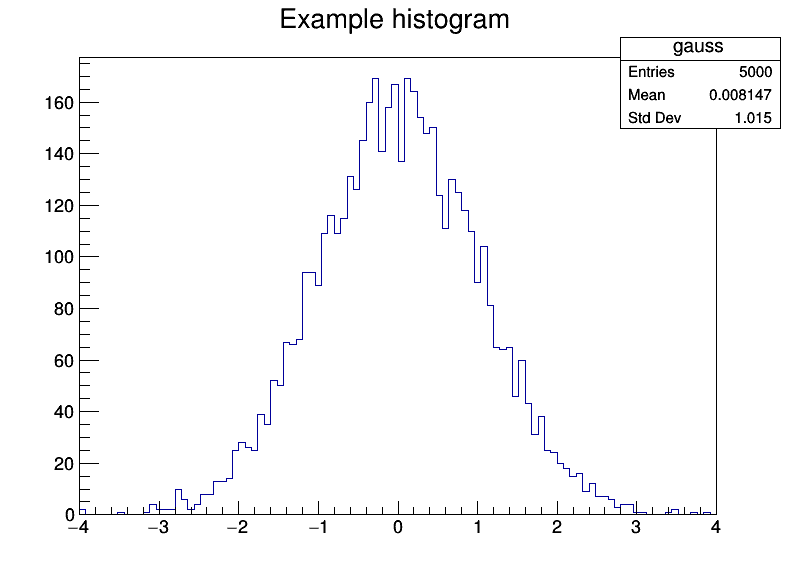

In [11]:
#Now we can check if we have everything working as we expect: 
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()

In [12]:
!mkdir -p DATA && cd DATA  && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root


--2020-03-03 13:45:02--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root
Resolving opendata.cern.ch (opendata.cern.ch)... 188.184.28.138, 188.185.82.144, 188.184.93.89, ...
Connecting to opendata.cern.ch (opendata.cern.ch)|188.184.28.138|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444723234 (424M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetUp.root’

B2HHH_MagnetUp.root 100%[===================>] 424.12M  15.6MB/s    in 43s     

2020-03-03 13:45:46 (9.79 MB/s) - ‘B2HHH_MagnetUp.root’ saved [444723234/444723234]



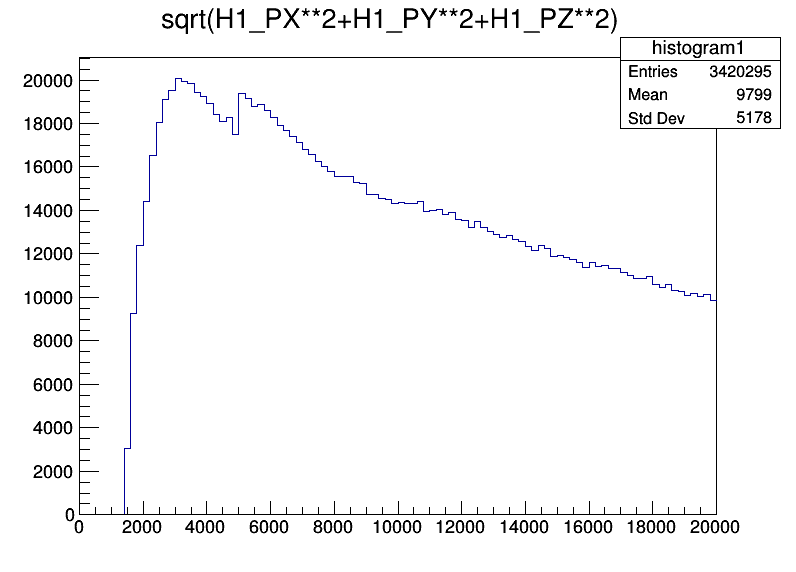

In [19]:
#Since we need to use ROOT, we must first import this into Python:
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')
import ROOT
#Then we open the ROOT file using the TFile command.
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
# Now we create a canvas, plot our data onto the canvas and draw it:

c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#This string (below) is the total momentum of the H1 particle
tree.Draw("sqrt(H1_PX**2+H1_PY**2+H1_PZ**2)>>histogram1(100,0,20000)")
#tree.Draw("sqrt((H1_PX**2)+(H1_PY**2)+(H1_PZ**2))+>>histogram1,100")
histogram1 = ROOT.gDirectory.Get("histogram1")
#histogram1.Draw()
#Show me the canvas
c.Draw()

In [20]:
###We need to tell Python what the total momentum is defined as mathematically - do that in this code block:
from numpy import *
import numpy as np
from math import *

#Hint: I suggest we define a function which we might want to use later - something like:


def p_tot_daughter(daughter):
  p_tot = "sqrt(("+daughter +"_PX)**2 + ("+daughter +"_PY)**2 + ("+daughter +"_PZ)**2)"
  return p_tot
 

p_tot_daughter("H1")




p_tot_daughter('H2')

'sqrt((H2_PX)**2 + (H2_PY)**2 + (H2_PZ)**2)'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Momentums of particles


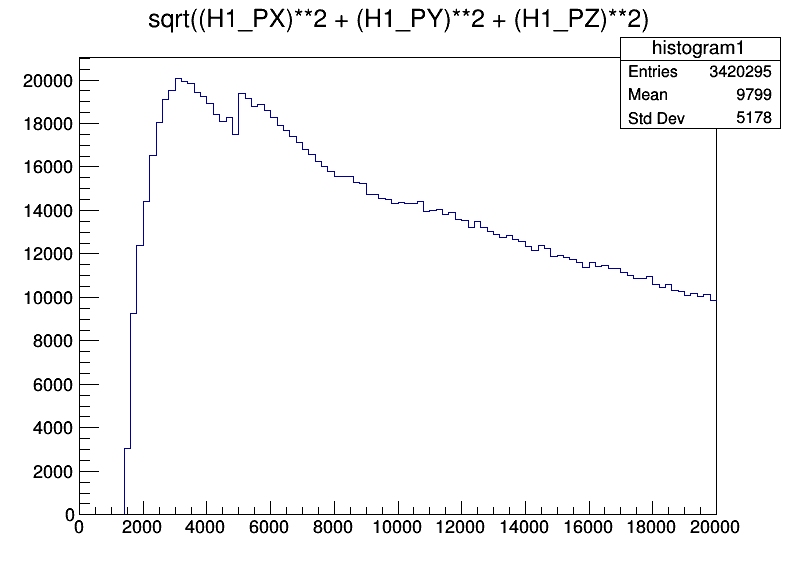

In [21]:
#use the histogram plotting tools, call your function to find the total momentum and then plot it!\

#defining the 3 diff particles
p1 = "H1"
p2 = "H2"
p3 = "H3"

f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")

tree=f.Get("DecayTree")

### H1 histo
c1 = ROOT.TCanvas("Momentums of particles","Momentum",800,600)
tree.Draw(p_tot_daughter(p1)+">>histogram1(100,0,20000)")
histogram1 = ROOT.gDirectory.Get("histogram1")
c1.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Momentums of particles


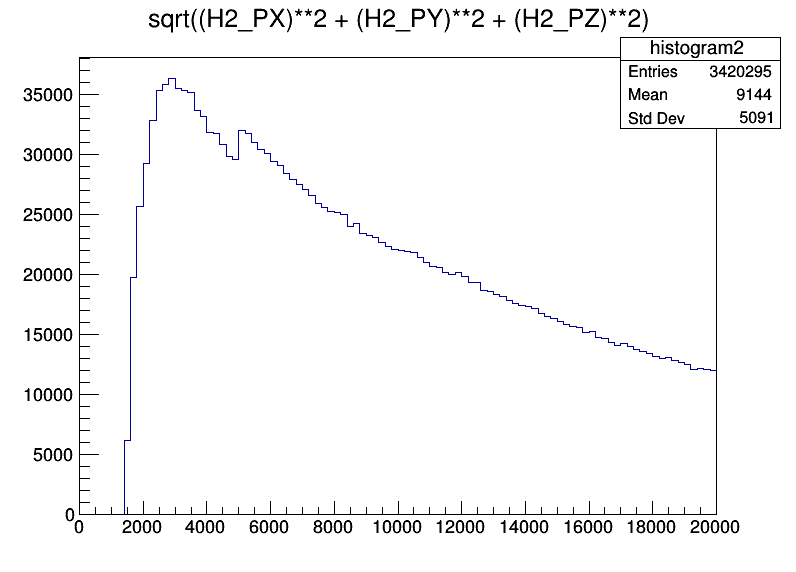

In [22]:
### H2 histo
c2 = ROOT.TCanvas("Momentums of particles","Momentum",800,600)
tree.Draw(p_tot_daughter(p2)+">>histogram2(100,0,20000)")
histogram2 = ROOT.gDirectory.Get("histogram2")
c2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Momentums of particles


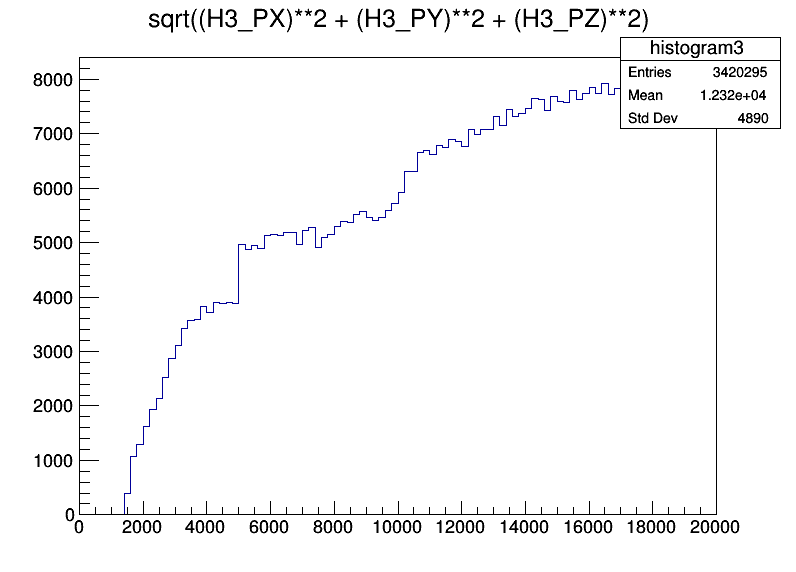

In [23]:
### H3 histo
c3 = ROOT.TCanvas("Momentums of particles","Momentum",800,600)
tree.Draw(p_tot_daughter(p3)+">>histogram3(100,0,20000)")
histogram3 = ROOT.gDirectory.Get("histogram3")
c3.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Energy


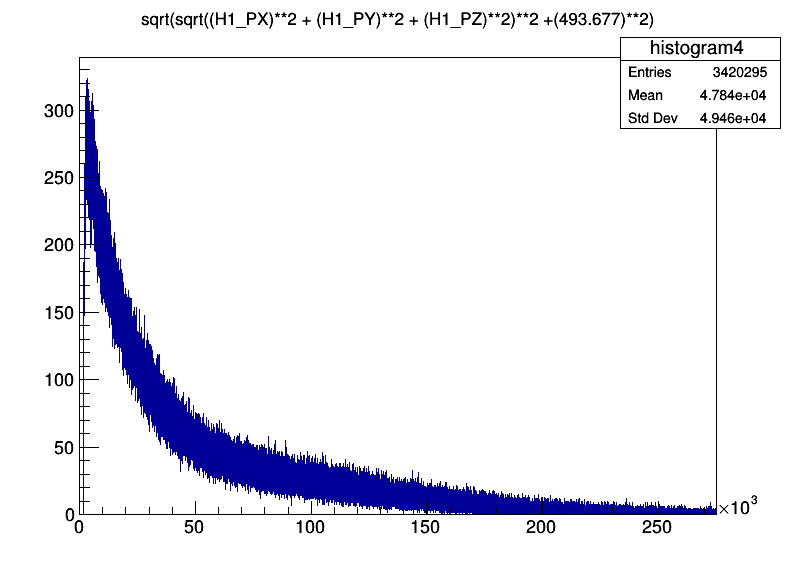

In [25]:
#####Energy calculation

f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")

tree=f.Get("DecayTree")

c = 299792458     # m/s
mkaon = 493.677   #meV/c^2

                      
def ekaon (p1):
  ekaon = "sqrt("+p_tot_daughter(p1)+"**2 +("+str(mkaon)+")**2)"       # (meV/c)
  return ekaon

############draw energy graph for p1
e1 = ROOT.TCanvas("Energy","Energy",800,600)
tree.Draw(ekaon(p1)+">>histogram4(100000,0,275000)")
histogram4 = ROOT.gDirectory.Get("histogram4")
e1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Energy


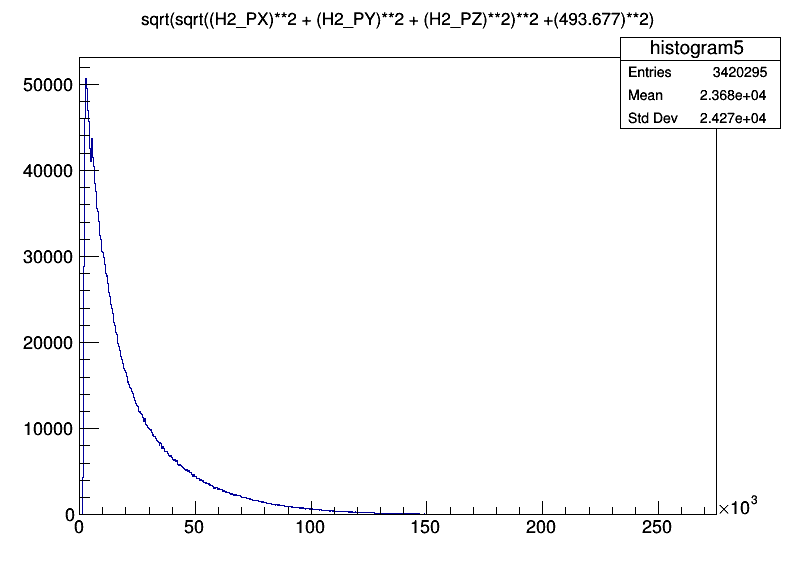

In [26]:
############draw energy graph for p2
e2 = ROOT.TCanvas("Energy","Energy",800,600)
tree.Draw(ekaon(p2)+">>histogram5(1000,0,275000)")
histogram5 = ROOT.gDirectory.Get("histogram5")
e2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Energy


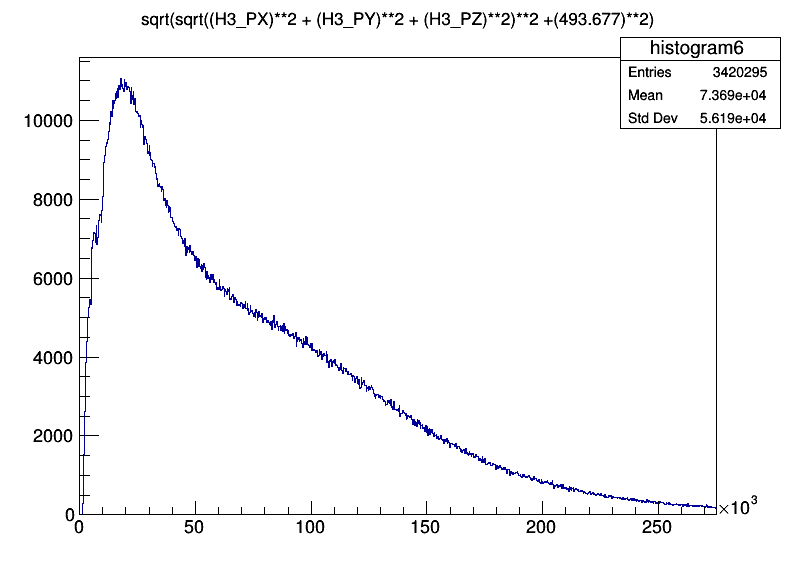

In [27]:
############draw energy graph for p3
e3 = ROOT.TCanvas("Energy","Energy",800,600)
tree.Draw(ekaon(p3)+">>histogram6(1000,0,275000)")
histogram6 = ROOT.gDirectory.Get("histogram6")
e3.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Energy


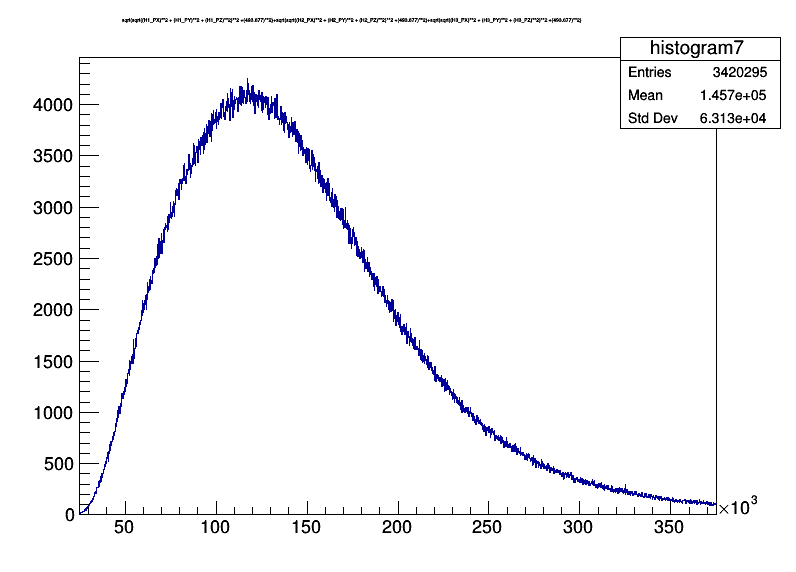

In [30]:
#Calculate the energy of the B meson, using the conservation of energy - just combine the energies to give a total


etot = ROOT.TCanvas("Energy","Energy",800,600)
tree.Draw((ekaon(p1)+"+"+ekaon(p2)+"+"+ekaon(p3))+">>histogram7(2000,25000,375000)")
histogram7 = ROOT.gDirectory.Get("histogram7")
etot.Draw()